<!-- dom:TITLE: Data Analysis and Machine Learning  Lectures: Optimization and  Gradient Methods -->
# Data Analysis and Machine Learning  Lectures: Optimization and  Gradient Methods
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Mar 11, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Optimization problems, why?

## Optimization, the central part of any Machine Learning algortithm

Almost every problem in machine learning and data science starts with
a dataset $X$, a model $g(\beta)$, which is a function of the
parameters $\beta$ and a cost function $C(X, g(\beta))$ that allows
us to judge how well the model $g(\beta)$ explains the observations
$X$. The model is fit by finding the values of $\beta$ that minimize
the cost function. Ideally we would be able to solve for $\beta$
analytically, however this is not possible in general and we must use
some approximative/numerical method to compute the minimum.


## Revisiting our Logistic Regression case

In our discussion on Logistic Regression we studied the 
case of
two classes, with $y_i$ either
$0$ or $1$. Furthermore we assumed also that we have only two
parameters $\beta$ in our fitting, that is we
defined probabilities

$$
\begin{align*}
p(y_i=1|x_i,\hat{\beta}) &= \frac{\exp{(\beta_0+\beta_1x_i)}}{1+\exp{(\beta_0+\beta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\hat{\beta}) &= 1 - p(y_i=1|x_i,\hat{\beta}),
\end{align*}
$$

where $\hat{\beta}$ are the weights we wish to extract from data, in our case $\beta_0$ and $\beta_1$. 

## The equations to solve

Our compact equations used a definition of a vector $\hat{y}$ with $n$
elements $y_i$, an $n\times p$ matrix $\hat{X}$ which contains the
$x_i$ values and a vector $\hat{p}$ of fitted probabilities
$p(y_i\vert x_i,\hat{\beta})$. We rewrote in a more compact form
the first derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right).
$$

If we in addition define a diagonal matrix $\hat{W}$ with elements 
$p(y_i\vert x_i,\hat{\beta})(1-p(y_i\vert x_i,\hat{\beta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}\partial \hat{\beta}^T} = \hat{X}^T\hat{W}\hat{X}.
$$

This defines what is called  the Hessian matrix.

## Solving using Newton-Raphson's method

If we can set up these equations, Newton-Raphson's iterative method is normally the method of choice. It requires however that we can compute in an efficient way the  matrices that define the first and second derivatives. 

Our iterative scheme is then given by

$$
\hat{\beta}^{\mathrm{new}} = \hat{\beta}^{\mathrm{old}}-\left(\frac{\partial^2 \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}\partial \hat{\beta}^T}\right)^{-1}_{\hat{\beta}^{\mathrm{old}}}\times \left(\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}}\right)_{\hat{\beta}^{\mathrm{old}}},
$$

or in matrix form as

$$
\hat{\beta}^{\mathrm{new}} = \hat{\beta}^{\mathrm{old}}-\left(\hat{X}^T\hat{W}\hat{X} \right)^{-1}\times \left(-\hat{X}^T(\hat{y}-\hat{p}) \right)_{\hat{\beta}^{\mathrm{old}}}.
$$

The right-hand side is computed with the old values of $\beta$. 

If we can compute these matrices, in particular the Hessian, the above is often the easiest method to implement. 


## Brief reminder on Newton-Raphson's method

Let us quickly remind ourselves how we derive the above method.

Perhaps the most celebrated of all one-dimensional root-finding
routines is Newton's method, also called the Newton-Raphson
method. This method  requires the evaluation of both the
function $f$ and its derivative $f'$ at arbitrary points. 
If you can only calculate the derivative
numerically and/or your function is not of the smooth type, we
normally discourage the use of this method.

## The equations

The Newton-Raphson formula consists geometrically of extending the
tangent line at a current point until it crosses zero, then setting
the next guess to the abscissa of that zero-crossing.  The mathematics
behind this method is rather simple. Employing a Taylor expansion for
$x$ sufficiently close to the solution $s$, we have

<!-- Equation labels as ordinary links -->
<div id="eq:taylornr"></div>

$$
f(s)=0=f(x)+(s-x)f'(x)+\frac{(s-x)^2}{2}f''(x) +\dots.
    \label{eq:taylornr} \tag{1}
$$

For small enough values of the function and for well-behaved
functions, the terms beyond linear are unimportant, hence we obtain

$$
f(x)+(s-x)f'(x)\approx 0,
$$

yielding

$$
s\approx x-\frac{f(x)}{f'(x)}.
$$

Having in mind an iterative procedure, it is natural to start iterating with

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}.
$$

## Simple geometric interpretation

The above is Newton-Raphson's method. It has a simple geometric
interpretation, namely $x_{n+1}$ is the point where the tangent from
$(x_n,f(x_n))$ crosses the $x$-axis.  Close to the solution,
Newton-Raphson converges fast to the desired result. However, if we
are far from a root, where the higher-order terms in the series are
important, the Newton-Raphson formula can give grossly inaccurate
results. For instance, the initial guess for the root might be so far
from the true root as to let the search interval include a local
maximum or minimum of the function.  If an iteration places a trial
guess near such a local extremum, so that the first derivative nearly
vanishes, then Newton-Raphson may fail totally


## Extending to more than one variable

Newton's method can be generalized to systems of several non-linear equations
and variables. Consider the case with two equations

$$
\begin{array}{cc} f_1(x_1,x_2) &=0\\
                     f_2(x_1,x_2) &=0,\end{array}
$$

which we Taylor expand to obtain

$$
\begin{array}{cc} 0=f_1(x_1+h_1,x_2+h_2)=&f_1(x_1,x_2)+h_1
                     \partial f_1/\partial x_1+h_2
                     \partial f_1/\partial x_2+\dots\\
                     0=f_2(x_1+h_1,x_2+h_2)=&f_2(x_1,x_2)+h_1
                     \partial f_2/\partial x_1+h_2
                     \partial f_2/\partial x_2+\dots
                       \end{array}.
$$

Defining the Jacobian matrix ${\bf \hat{J}}$ we have

$$
{\bf \hat{J}}=\left( \begin{array}{cc}
                         \partial f_1/\partial x_1  & \partial f_1/\partial x_2 \\
                          \partial f_2/\partial x_1     &\partial f_2/\partial x_2
             \end{array} \right),
$$

we can rephrase Newton's method as

$$
\left(\begin{array}{c} x_1^{n+1} \\ x_2^{n+1} \end{array} \right)=
\left(\begin{array}{c} x_1^{n} \\ x_2^{n} \end{array} \right)+
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right),
$$

where we have defined

$$
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right)=
   -{\bf \hat{J}}^{-1}
   \left(\begin{array}{c} f_1(x_1^{n},x_2^{n}) \\ f_2(x_1^{n},x_2^{n}) \end{array} \right).
$$

We need thus to compute the inverse of the Jacobian matrix and it
is to understand that difficulties  may
arise in case ${\bf \hat{J}}$ is nearly singular.

It is rather straightforward to extend the above scheme to systems of
more than two non-linear equations. In our case, the Jacobian matrix is given by the Hessian that represents the second derivative of cost function. 



## Steepest descent

The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

<!-- !split  -->
## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

<!-- !split  -->
## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.


<!-- !split  -->
## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see below.


<!-- !split  -->
## Convex functions

Ideally we want our cost/loss function to be convex(concave).

First we give the definition of a convex set: A set $C$ in
$\mathbb{R}^n$ is said to be convex if, for all $x$ and $y$ in $C$ and
all $t \in (0,1)$ , the point $(1 − t)x + ty$ also belongs to
C. Geometrically this means that every point on the line segment
connecting $x$ and $y$ is in $C$ as discussed below.

The convex subsets of $\mathbb{R}$ are the intervals of
$\mathbb{R}$. Examples of convex sets of $\mathbb{R}^2$ are the
regular polygons (triangles, rectangles, pentagons, etc...).

## Convex function

**Convex function**: Let $X \subset \mathbb{R}^n$ be a convex set. Assume that the function $f: X \rightarrow \mathbb{R}$ is continuous, then $f$ is said to be convex if $$f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$ for all $x_1, x_2 \in X$ and for all $t \in [0,1]$. If $\leq$ is replaced with a strict inequaltiy in the definition, we demand $x_1 \neq x_2$ and $t\in(0,1)$ then $f$ is said to be strictly convex. For a single variable function, convexity means that if you draw a straight line connecting $f(x_1)$ and $f(x_2)$, the value of the function on the interval $[x_1,x_2]$ is always below the line as illustrated below.

## Conditions on convex functions

In the following we state first and second-order conditions which
ensures convexity of a function $f$. We write $D_f$ to denote the
domain of $f$, i.e the subset of $R^n$ where $f$ is defined. For more
details and proofs we refer to: [S. Boyd and L. Vandenberghe. Convex Optimization. Cambridge University Press](http://stanford.edu/boyd/cvxbook/, 2004).

**First order condition.**

Suppose $f$ is differentiable (i.e $\nabla f(x)$ is well defined for
all $x$ in the domain of $f$). Then $f$ is convex if and only if $D_f$
is a convex set and $$f(y) \geq f(x) + \nabla f(x)^T (y-x) $$ holds
for all $x,y \in D_f$. This condition means that for a convex function
the first order Taylor expansion (right hand side above) at any point
a global under estimator of the function. To convince yourself you can
make a drawing of $f(x) = x^2+1$ and draw the tangent line to $f(x)$ and
note that it is always below the graph.



**Second order condition.**

Assume that $f$ is twice
differentiable, i.e the Hessian matrix exists at each point in
$D_f$. Then $f$ is convex if and only if $D_f$ is a convex set and its
Hessian is positive semi-definite for all $x\in D_f$. For a
single-variable function this reduces to $f''(x) \geq 0$. Geometrically this means that $f$ has nonnegative curvature
everywhere.



This condition is particularly useful since it gives us an procedure for determining if the function under consideration is convex, apart from using the definition.

## More on convex functions

The next result is of great importance to us and the reason why we are
going on about convex functions. In machine learning we frequently
have to minimize a loss/cost function in order to find the best
parameters for the model we are considering. 

Ideally we want the
global minimum (for high-dimensional models it is hard to know
if we have local or global minimum). However, if the cost/loss function
is convex the following result provides invaluable information:

**Any minimum is global for convex functions.**

Consider the problem of finding $x \in \mathbb{R}^n$ such that $f(x)$
is minimal, where $f$ is convex and differentiable. Then, any point
$x^*$ that satisfies $\nabla f(x^*) = 0$ is a global minimum.



This result means that if we know that the cost/loss function is convex and we are able to find a minimum, we are guaranteed that it is a global minimum.

## Some simple problems

1. Show that $f(x)=x^2$ is convex for $x \in \mathbb{R}$ using the definition of convexity. Hint: If you re-write the definition, $f$ is convex if the following holds for all $x,y \in D_f$ and any $\lambda \in [0,1]$ $\lambda f(x)+(1-\lambda)f(y)-f(\lambda x + (1-\lambda) y ) \geq 0$.

2. Using the second order condition show that the following functions are convex on the specified domain.

 * $f(x) = e^x$ is convex for $x \in \mathbb{R}$.

 * $g(x) = -\ln(x)$ is convex for $x \in (0,\infty)$.


3. Let $f(x) = x^2$ and $g(x) = e^x$. Show that $f(g(x))$ and $g(f(x))$ is convex for $x \in \mathbb{R}$. Also show that if $f(x)$ is any convex function than $h(x) = e^{f(x)}$ is convex.

4. A norm is any function that satisfy the following properties

 * $f(\alpha x) = |\alpha| f(x)$ for all $\alpha \in \mathbb{R}$.

 * $f(x+y) \leq f(x) + f(y)$

 * $f(x) \leq 0$ for all $x \in \mathbb{R}^n$ with equality if and only if $x = 0$


Using the definition of convexity, try to show that a function satisfying the properties above is convex (the third condition is not needed to show this).


## Standard steepest descent


Before we proceed, we would like to discuss the approach called the
**standard Steepest descent**, which again leads to us having to be able
to compute a matrix. It belongs to the class of Conjugate Gradient methods (CG).

[The success of the CG method](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
for finding solutions of non-linear problems is based on the theory
of conjugate gradients for linear systems of equations. It belongs to
the class of iterative methods for solving problems from linear
algebra of the type

$$
\hat{A}\hat{x} = \hat{b}.
$$

In the iterative process we end up with a problem like

$$
\hat{r}= \hat{b}-\hat{A}\hat{x},
$$

where $\hat{r}$ is the so-called residual or error in the iterative process.

When we have found the exact solution, $\hat{r}=0$.

## Gradient method

The residual is zero when we reach the minimum of the quadratic equation

$$
P(\hat{x})=\frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T\hat{b},
$$

with the constraint that the matrix $\hat{A}$ is positive definite and
symmetric.  This defines also the Hessian and we want it to be  positive definite.  


## Steepest descent  method

We denote the initial guess for $\hat{x}$ as $\hat{x}_0$. 
We can assume without loss of generality that

$$
\hat{x}_0=0,
$$

or consider the system

$$
\hat{A}\hat{z} = \hat{b}-\hat{A}\hat{x}_0,
$$

instead.


## Steepest descent  method
One can show that the solution $\hat{x}$ is also the unique minimizer of the quadratic form

$$
f(\hat{x}) = \frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T \hat{x} , \quad \hat{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\hat{r}_1$ (see below for definition) 
to be the gradient of $f$ at $\hat{x}=\hat{x}_0$, 
which equals

$$
\hat{A}\hat{x}_0-\hat{b},
$$

and 
$\hat{x}_0=0$ it is equal $-\hat{b}$.



## Final expressions
We can compute the residual iteratively as

$$
\hat{r}_{k+1}=\hat{b}-\hat{A}\hat{x}_{k+1},
$$

which equals

$$
\hat{b}-\hat{A}(\hat{x}_k+\alpha_k\hat{r}_k),
$$

or

$$
(\hat{b}-\hat{A}\hat{x}_k)-\alpha_k\hat{A}\hat{r}_k,
$$

which gives

$$
\alpha_k = \frac{\hat{r}_k^T\hat{r}_k}{\hat{r}_k^T\hat{A}\hat{r}_k}
$$

leading to the iterative scheme

$$
\hat{x}_{k+1}=\hat{x}_k-\alpha_k\hat{r}_{k},
$$

## Code examples for steepest descent

## Simple codes for  steepest descent and conjugate gradient using a $2\times 2$ matrix, in c++, Python code to come

        #include <cmath>
        #include <iostream>
        #include <fstream>
        #include <iomanip>
        #include "vectormatrixclass.h"
        using namespace  std;
        //   Main function begins here
        int main(int  argc, char * argv[]){
          int dim = 2;
          Vector x(dim),xsd(dim), b(dim),x0(dim);
          Matrix A(dim,dim);
        
          // Set our initial guess
          x0(0) = x0(1) = 0;
          // Set the matrix
          A(0,0) =  3;    A(1,0) =  2;   A(0,1) =  2;   A(1,1) =  6;
          b(0) = 2; b(1) = -8;
          cout << "The Matrix A that we are using: " << endl;
          A.Print();
          cout << endl;
          xsd = SteepestDescent(A,b,x0);
          cout << "The approximate solution using Steepest Descent is: " << endl;
          xsd.Print();
          cout << endl;
        }


## The routine for the steepest descent method

        Vector SteepestDescent(Matrix A, Vector b, Vector x0){
          int IterMax, i;
          int dim = x0.Dimension();
          const double tolerance = 1.0e-14;
          Vector x(dim),f(dim),z(dim);
          double c,alpha,d;
          IterMax = 30;
          x = x0;
          r = A*x-b;
          i = 0;
          while (i <= IterMax){
            z = A*r;
            c = dot(r,r);
            alpha = c/dot(r,z);
            x = x - alpha*r;
            r =  A*x-b;
            if(sqrt(dot(r,r)) < tolerance) break;
            i++;
          }
          return x;
        }


## Steepest descent example

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

fig = pt.figure()
ax = fig.gca(projection="3d")

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as countor plot

In [2]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)
guesses = [np.array([2, 2./5])]

Find guesses

In [3]:
x = guesses[-1]
s = -df(x)

Run it!

In [4]:
def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)
print(next_guess)

What happened?

In [5]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

## Conjugate gradient method
In the CG method we define so-called conjugate directions and two vectors 
$\hat{s}$ and $\hat{t}$
are said to be
conjugate if

$$
\hat{s}^T\hat{A}\hat{t}= 0.
$$

The philosophy of the CG method is to perform searches in various conjugate directions
of our vectors $\hat{x}_i$ obeying the above criterion, namely

$$
\hat{x}_i^T\hat{A}\hat{x}_j= 0.
$$

Two vectors are conjugate if they are orthogonal with respect to 
this inner product. Being conjugate is a symmetric relation: if $\hat{s}$ is conjugate to $\hat{t}$, then $\hat{t}$ is conjugate to $\hat{s}$.



## Conjugate gradient method
An example is given by the eigenvectors of the matrix

$$
\hat{v}_i^T\hat{A}\hat{v}_j= \lambda\hat{v}_i^T\hat{v}_j,
$$

which is zero unless $i=j$.




## Conjugate gradient method
Assume now that we have a symmetric positive-definite matrix $\hat{A}$ of size
$n\times n$. At each iteration $i+1$ we obtain the conjugate direction of a vector

$$
\hat{x}_{i+1}=\hat{x}_{i}+\alpha_i\hat{p}_{i}.
$$

We assume that $\hat{p}_{i}$ is a sequence of $n$ mutually conjugate directions. 
Then the $\hat{p}_{i}$  form a basis of $R^n$ and we can expand the solution 
$  \hat{A}\hat{x} = \hat{b}$ in this basis, namely

$$
\hat{x}  = \sum^{n}_{i=1} \alpha_i \hat{p}_i.
$$

## Conjugate gradient method
The coefficients are given by

$$
\mathbf{A}\mathbf{x} = \sum^{n}_{i=1} \alpha_i \mathbf{A} \mathbf{p}_i = \mathbf{b}.
$$

Multiplying with $\hat{p}_k^T$  from the left gives

$$
\hat{p}_k^T \hat{A}\hat{x} = \sum^{n}_{i=1} \alpha_i\hat{p}_k^T \hat{A}\hat{p}_i= \hat{p}_k^T \hat{b},
$$

and we can define the coefficients $\alpha_k$ as

$$
\alpha_k = \frac{\hat{p}_k^T \hat{b}}{\hat{p}_k^T \hat{A} \hat{p}_k}
$$

## Conjugate gradient method and iterations

If we choose the conjugate vectors $\hat{p}_k$ carefully, 
then we may not need all of them to obtain a good approximation to the solution 
$\hat{x}$. 
We want to regard the conjugate gradient method as an iterative method. 
This will us to solve systems where $n$ is so large that the direct 
method would take too much time.

We denote the initial guess for $\hat{x}$ as $\hat{x}_0$. 
We can assume without loss of generality that

$$
\hat{x}_0=0,
$$

or consider the system

$$
\hat{A}\hat{z} = \hat{b}-\hat{A}\hat{x}_0,
$$

instead.




## Conjugate gradient method
One can show that the solution $\hat{x}$ is also the unique minimizer of the quadratic form

$$
f(\hat{x}) = \frac{1}{2}\hat{x}^T\hat{A}\hat{x} - \hat{x}^T \hat{x} , \quad \hat{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\hat{p}_1$ 
to be the gradient of $f$ at $\hat{x}=\hat{x}_0$, 
which equals

$$
\hat{A}\hat{x}_0-\hat{b},
$$

and 
$\hat{x}_0=0$ it is equal $-\hat{b}$.
The other vectors in the basis will be conjugate to the gradient, 
hence the name conjugate gradient method.




## Conjugate gradient method
Let  $\hat{r}_k$ be the residual at the $k$-th step:

$$
\hat{r}_k=\hat{b}-\hat{A}\hat{x}_k.
$$

Note that $\hat{r}_k$ is the negative gradient of $f$ at 
$\hat{x}=\hat{x}_k$, 
so the gradient descent method would be to move in the direction $\hat{r}_k$. 
Here, we insist that the directions $\hat{p}_k$ are conjugate to each other, 
so we take the direction closest to the gradient $\hat{r}_k$  
under the conjugacy constraint. 
This gives the following expression

$$
\hat{p}_{k+1}=\hat{r}_k-\frac{\hat{p}_k^T \hat{A}\hat{r}_k}{\hat{p}_k^T\hat{A}\hat{p}_k} \hat{p}_k.
$$

## Conjugate gradient method
We can also  compute the residual iteratively as

$$
\hat{r}_{k+1}=\hat{b}-\hat{A}\hat{x}_{k+1},
$$

which equals

$$
\hat{b}-\hat{A}(\hat{x}_k+\alpha_k\hat{p}_k),
$$

or

$$
(\hat{b}-\hat{A}\hat{x}_k)-\alpha_k\hat{A}\hat{p}_k,
$$

which gives

$$
\hat{r}_{k+1}=\hat{r}_k-\hat{A}\hat{p}_{k},
$$

## Simple implementation of the Conjugate gradient algorithm

          Vector ConjugateGradient(Matrix A, Vector b, Vector x0){
          int dim = x0.Dimension();
          const double tolerance = 1.0e-14;
          Vector x(dim),r(dim),v(dim),z(dim);
          double c,t,d;
        
          x = x0;
          r = b - A*x;
          v = r;
          c = dot(r,r);
          int i = 0; IterMax = dim;
          while(i <= IterMax){
            z = A*v;
            t = c/dot(v,z);
            x = x + t*v;
            r = r - t*z;
            d = dot(r,r);
            if(sqrt(d) < tolerance)
              break;
            v = r + (d/c)*v;
            c = d;  i++;
          }
          return x;
        } 


## Broyden–Fletcher–Goldfarb–Shanno algorithm
The optimization problem is to minimize $f(\mathbf {x} )$ where $\mathbf {x}$  is a vector in $R^{n}$, and $f$ is a differentiable scalar function. There are no constraints on the values that  $\mathbf {x}$  can take.

The algorithm begins at an initial estimate for the optimal value $\mathbf {x}_{0}$ and proceeds iteratively to get a better estimate at each stage.

The search direction $p_k$ at stage $k$ is given by the solution of the analogue of the Newton equation

$$
B_{k}\mathbf {p} _{k}=-\nabla f(\mathbf {x}_{k}),
$$

where $B_{k}$ is an approximation to the Hessian matrix, which is
updated iteratively at each stage, and $\nabla f(\mathbf {x} _{k})$
is the gradient of the function
evaluated at $x_k$. 
A line search in the direction $p_k$ is then used to
find the next point $x_{k+1}$ by minimising

$$
f(\mathbf {x}_{k}+\alpha \mathbf {p}_{k}),
$$

over the scalar $\alpha > 0$.







<!-- !split  -->
## Revisiting our first homework

We will use linear regression as a case study for the gradient descent
methods. Linear regression is a great test case for the gradient
descent methods discussed in the lectures since it has several
desirable properties such as:

1. An analytical solution (recall homework set 1).

2. The gradient can be computed analytically.

3. The cost function is convex which guarantees that gradient descent converges for small enough learning rates

We revisit the example from homework set 1 where we had

$$
y_i = 5x_i^2 + 0.1\xi_i, \ i=1,\cdots,100
$$

with $x_i \in [0,1] $ chosen randomly with a uniform distribution. Additionally $\xi_i$ represents stochastic noise chosen according to a normal distribution $\cal {N}(0,1)$. 
The linear regression model is given by

$$
h_\beta(x) = \hat{y} = \beta_0 + \beta_1 x,
$$

such that

$$
\hat{y}_i = \beta_0 + \beta_1 x_i.
$$

<!-- !split  -->
## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\hat{y}} = (\hat{y}_1,\cdots,\hat{y}_n)^T$ and $\beta = (\beta_0, \beta_1)^T$

It is convenient to write $\mathbf{\hat{y}} = X\beta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by

$$
X \equiv \begin{bmatrix}
1 &amp; x_1  \\
\vdots &amp; \vdots  \\
1 &amp; x_{100} &amp;  \\
\end{bmatrix}.
$$

The loss function is given by

$$
C(\beta) = ||X\beta-\mathbf{y}||^2 = ||X\beta||^2 - 2 \mathbf{y}^T X\beta + ||\mathbf{y}||^2 = \sum_{i=1}^{100} (\beta_0 + \beta_1 x_i)^2 - 2 y_i (\beta_0 + \beta_1 x_i) + y_i^2
$$

and we want to find $\beta$ such that $C(\beta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\beta) / \partial \beta_0$ and $\partial C(\beta) / \partial \beta_1$ we can show  that the gradient can be written as

$$
\nabla_{\beta} C(\beta) = (\partial C(\beta) / \partial \beta_0, \partial C(\beta) / \partial \beta_1)^T = 2\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = 2X^T(X\beta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\beta)$ is given by

$$
\hat{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} &amp; \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} &amp; \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &amp;  \\
\end{bmatrix} = 2X^T X.
$$

This result implies that $C(\beta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.




## Simple program

We can now write a program that minimizes $C(\beta)$ using the gradient descent method with a constant learning rate $\gamma$ according to

$$
\beta_{k+1} = \beta_k - \gamma \nabla_\beta C(\beta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\beta_0$ be chosen randomly and let $\gamma = 0.001$. Stop iterating
when $||\nabla_\beta C(\beta_k) || \leq \epsilon = 10^{-8}$. 

And finally we can compare our solution for $\beta$ with the analytic result given by 
$\beta= (X^TX)^{-1} X^T \mathbf{y}$.

In [1]:
import numpy as np

"""
The following setup is just a suggestion, feel free to write it the way you like.
"""

#Setup problem described in the exercise
N  = 100 #Nr of datapoints
M  = 2 #Nr of features
x  = np.random.rand(N) #Uniformly generated x-values in [0,1]
y  = 5*x**2 + 0.1*np.random.randn(N)
X  = np.c_[np.ones(N),x] #Construct design matrix

#Compute beta according to normal equations to compare with GD solution
Xt_X_inv = np.linalg.inv(np.dot(X.T,X))
Xt_y     = np.dot(X.transpose(),y)
beta_NE = np.dot(Xt_X_inv,Xt_y)
print(beta_NE)

[-0.81411189  4.9280671 ]


## Gradient Descent Example

Another simple example is here

[[4.08505172]
 [2.87082446]]
[[4.08505172]
 [2.87082446]]


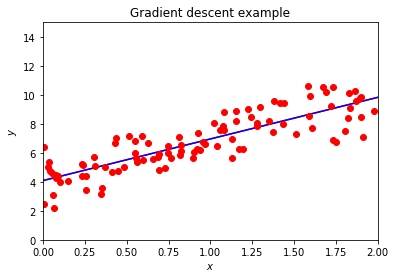

In [6]:

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
beta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 0.1
Niterations = 1000
m = 100

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(beta)-y)
    beta -= eta*gradients

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## And a corresponding example using **scikit-learn**

In [4]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
beta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(beta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print(sgdreg.intercept_, sgdreg.coef_)

[[3.95015403]
 [3.15542884]]
[3.95312545] [3.15713095]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


<!-- !split  -->
## Gradient descent and Ridge

We have also discussed Ridge regression where the loss function contains a regularized given by the $L_2$ norm of $\beta$,

$$
C_{\text{ridge}}(\beta) = ||X\beta -\mathbf{y}||^2 + \lambda ||\beta||^2, \ \lambda \geq 0.
$$

In order to minimize $C_{\text{ridge}}(\beta)$ using GD we only have adjust the gradient as follows

$$
\nabla_\beta C_{\text{ridge}}(\beta)  = 2\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \beta_0 \\ \beta_1\end{bmatrix} = 2 (X^T(X\beta - \mathbf{y})+\lambda \beta).
$$

We can now extend our program to minimize $C_{\text{ridge}}(\beta)$ using gradient descent and compare with the analytical solution given by

$$
\beta_{\text{ridge}} = \left(X^T X + \lambda I_{2 \times 2} \right)^{-1} X^T \mathbf{y},
$$

for $\lambda = {0,1,10,50,100}$ ($\lambda = 0$ corresponds to ordinary least squares). 
We can then compute $||\beta_{\text{ridge}}||$ for each $\lambda$.

In [9]:
import numpy as np

"""
The following setup is just a suggestion, feel free to write it the way you like.
"""

#Setup problem described in the exercise
N  = 100 #Nr of datapoints
M  = 2   #Nr of features
x  = np.random.rand(N)
y  = 5*x**2 + 0.1*np.random.randn(N)


#Compute analytic beta for Ridge regression 
X    = np.c_[np.ones(N),x]
XT_X = np.dot(X.T,X)

l  = 0.1 #Ridge parameter lambda
Id = np.eye(XT_X.shape[0])

Z = np.linalg.inv(XT_X+l*Id)
beta_ridge = np.dot(Z,np.dot(X.T,y))

print(beta_ridge)
print(np.linalg.norm(beta_ridge)) #||beta||

## Automatic differentiation
Python has tools for so-called **automatic differentiation**.
Consider the following example

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

which has the following derivative

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Using **autograd** we have

In [10]:
import autograd.numpy as np

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return np.sin(2*np.pi*x + x**2)

def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)

# Do the comparison:
x = np.linspace(0,1,1000)

f_grad = egrad(f)

computed = f_grad(x)
analytic = f_grad_analytic(x)

plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

<!-- !split  -->
## Using autograd

Here we
experiment with what kind of functions Autograd is capable
of finding the gradient of. The following Python functions are just
meant to illustrate what Autograd can do, but please feel free to
experiment with other, possibly more complicated, functions as well.

In [11]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 1.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

## Autograd with more complicated functions

To differentiate with respect to two (or more) arguments of a Python
function, Autograd need to know at which variable the function if
being differentiated with respect to.

In [12]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 3.0 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))

Note that the grad function will not produce the true gradient of the function. The true gradient of a function with two or more variables will produce a vector, where each element is the function differentiated w.r.t a variable.


## More complicated functions using the elements of their arguments directly

In [13]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3] + 11*x[4]**2

f3_grad = grad(f3)

x = np.linspace(0,4,5)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5, 7, 22*x[4])
f3_grad_analytical = np.array([2, 3, 5, 7, 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

Note that in this case, when sending an array as input argument, the
output from Autograd is another array. This is the true gradient of
the function, as opposed to the function in the previous example. By
using arrays to represent the variables, the output from Autograd
might be easier to work with, as the output is closer to what one
could expect form a gradient-evaluting function.

<!-- !split  -->
## Functions using mathematical functions from Numpy

In [14]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

## More autograd

In [15]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else:
        return -3*x + 1

f5_grad = grad(f5)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

## And  with loops

1
8
 
<
<
<
!
!
C
O
D
E
_
B
L
O
C
K
 
 
p
y
c
o
d

In [16]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 
f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)

print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical))

## Using recursion

In [17]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 2.0

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

Note that if n is equal to zero or one, Autograd will give an error message. This message appears when the output is independent on input.

## Unsupported functions
Autograd supports many features. However, there are some functions that is not supported (yet) by Autograd.

Assigning a value to the variable being differentiated with respect to

In [18]:
import autograd.numpy as np
from autograd import grad
def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

f8_grad = grad(f8)

x = 8.4

print("The derivative of f8 is:",f8_grad(x))

Here, Autograd tells us that an 'ArrayBox' does not support item assignment. The item assignment is done when the program tries to assign x[2] to the value 3. However, Autograd has implemented the computation of the derivative such that this assignment is not possible.

## The syntax a.dot(b) when finding the dot product

In [19]:
import autograd.numpy as np
from autograd import grad
def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return a.dot(b)

f9_grad = grad(f9)

x = np.array([1.0,0.0])

print("The derivative of f9 is:",f9_grad(x))

Here we are told that the 'dot' function does not belong to Autograd's
version of a Numpy array.  To overcome this, an alternative syntax
which also computed the dot product can be used:

In [20]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

## Recommended to avoid
The documentation recommends to avoid inplace operations such as

In [21]:
a += b
a -= b
a*= b
a /=b

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [22]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all.

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [23]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

## Program for stochastic gradient

Own inversion
[[4.174749  ]
 [2.83220009]]
sgdreg from scikit
[4.22088326] [2.87667941]
theta frm own gd
[[4.174749  ]
 [2.83220009]]
theta from own sdg
[[4.20289933]
 [2.87429278]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


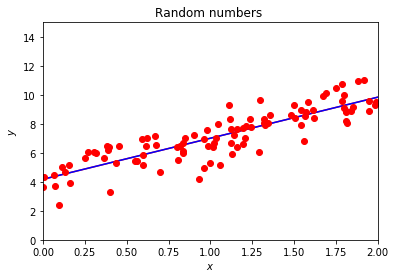

In [7]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

xb = np.c_[np.ones((100,1)), x]
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(n_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)

eta = 0.1
Niterations = 1000
m = 100

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(theta)-y)
    theta -= eta*gradients
print("theta frm own gd")
print(theta)

xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)
ypredict2 = xbnew.dot(theta_linreg)


n_epochs = 50
t0, t1 = 5, 50
m = 100
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = xb[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)






plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our energy function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the energy function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Momentum based GD

The stochastic gradient descent (SGD) is almost always used with a *momentum* or inertia term that serves as a memory of the direction we are moving in parameter space.  This is typically 
implemented as follows

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t},
\label{_auto1} \tag{2}
\end{equation}
$$

where we have introduced a momentum parameter $\gamma$, with $0\le\gamma\le 1$, and for brevity we dropped the explicit notation to indicate the gradient is to be taken over a different mini-batch at each step. We call this algorithm gradient descent with momentum (GDM). From these equations, it is clear that $\mathbf{v}_t$ is a running average of recently encountered gradients and $(1-\gamma)^{-1}$ sets the characteristic time scale for the memory used in the averaging procedure. Consistent with this, when $\gamma=0$, this just reduces down to ordinary SGD as discussed earlier. An equivalent way of writing the updates is

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

where we have defined $\Delta \boldsymbol{\theta}_{t}= \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.

## More on momentum based approaches

Let us try to get  more intuition from these equations. It is helpful to consider a simple physical analogy with a particle of mass $m$ moving in a viscous medium with drag coefficient $\mu$ and potential 
$E(\mathbf{w})$. If we denote the particle's position by $\mathbf{w}$, then its motion is described by

$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

We can discretize this equation in the usual way to get

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}).
$$

Rearranging this equation, we can rewrite this as

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

## Momentum parameter
Notice that this equation is identical to previous one if we identify the position of the particle, $\mathbf{w}$, with the parameters $\boldsymbol{\theta}$. This allows
us to identify the momentum parameter and learning rate with the mass of the particle and the viscous drag as:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Thus, as the name suggests, the momentum parameter is proportional to the mass of the particle and effectively provides inertia.  Furthermore, in the large viscosity/small learning rate limit, our memory time scales as $(1-\gamma)^{-1} \approx  m/(\mu \Delta t)$.

Why is momentum useful? SGD momentum helps the gradient descent algorithm gain speed in directions with persistent but small gradients even in the presence of stochasticity, while suppressing oscillations in high-curvature directions. This becomes especially important in situations where the landscape is shallow and flat in some directions and narrow and steep in others. It has been argued that first-order methods (with appropriate initial conditions) can perform comparable to more expensive second order methods, especially in the context of complex deep learning models. 

These beneficial properties of momentum can sometimes become even more pronounced by using a slight modification of the classical momentum algorithm called Nesterov Accelerated Gradient (NAG). 

In the NAG algorithm, rather than calculating the gradient at the current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one calculates the gradient at the expected value of the parameters given our current momentum,   $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto2} \tag{3}
\end{equation}
$$

One of the major advantages of NAG is that it allows for the use of a larger learning rate than GDM for the same choice of $\gamma$.


## Second moment of the gradient


In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

Recently, a number of methods have been introduced that accomplish this by tracking not only the gradient, but also the second moment of the gradient. These methods include AdaGrad, AdaDelta, RMS-Prop, and ADAM.

## RMS prop

In RMS prop, in addition to keeping a running average of the first moment of the gradient, we also keep track of the second moment denoted by $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$. The update rule for RMS prop is given by

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto3} \tag{4}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

where $\beta$ controls the averaging time of the second moment and is typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8} $ is a small regularization constant to prevent divergences. Multiplication and division by vectors is understood as an element-wise operation. It is clear from this formula that the learning rate is reduced in directions where the norm of the gradient is consistently large. This greatly speeds up the convergence by allowing us to use a larger learning rate for flat directions.


## ADAM optimizer

A related algorithm is the  ADAM optimizer. In ADAM, we keep a running average of both the first and second moment of the gradient and use this information to adaptively change the learning rate for different parameters. In addition to keeping a running average of the first and second moments of the gradient (i.e. $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ and $\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$, respectively), ADAM performs an additional bias correction to account for the fact that we are estimating the first two moments of the gradient using a running average (denoted by the hats in the update rule below). The update rule for ADAM is given by (where multiplication and division are once again understood to be element-wise operations below)

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto4} \tag{5}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\hat{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1^t} \nonumber
$$

$$
\hat{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \hat{\mathbf{m}}_t \over \sqrt{\hat{\mathbf{s}}_t} +\epsilon}, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} 
\label{_auto5} \tag{6}
\end{equation}
$$

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and second moment and are typically taken to be $0.9$ and $0.99$ respectively, and $\eta$ and $\epsilon$ are identical to RMSprop.

Like in RMSprop, the effective step size of a parameter depends on the magnitude of its gradient squared.  To understand this better, let us rewrite this expression in terms of the variance $\boldsymbol{\sigma}_t^2 = \hat{\mathbf{s}}_t - (\hat{\mathbf{m}}_t)^2$. Consider a single parameter $\theta_t$. The update rule for this parameter is given by

$$
\Delta \theta_{t+1}= -\eta_t { \hat{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the energy matrix is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

Geron's text, see chapter 11, has several interesting discussions.